In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 224
h = 224

x = []
t = []
count = 100

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  100
B 파일 길이 :  100
C 파일 길이 :  100
D 파일 길이 :  100
E 파일 길이 :  100
F 파일 길이 :  100
G 파일 길이 :  100
H 파일 길이 :  100
I 파일 길이 :  100
J 파일 길이 :  100
K 파일 길이 :  100
L 파일 길이 :  100
M 파일 길이 :  100
N 파일 길이 :  100
O 파일 길이 :  100
P 파일 길이 :  100
Q 파일 길이 :  100
R 파일 길이 :  100
S 파일 길이 :  100
T 파일 길이 :  100
U 파일 길이 :  100
V 파일 길이 :  100
W 파일 길이 :  100
X 파일 길이 :  100
Y 파일 길이 :  100
Z 파일 길이 :  100
Nothing 파일 길이 :  100
Space 파일 길이 :  100
데이터 준비 및 전처리 완료!


In [3]:
print(type(x))
print(type(t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(2100, 224, 224, 3)
(2100, 28)
(700, 224, 224, 3)
(700, 28)


In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
model.fit(x_train, t_train, epochs=10, batch_size=64, validation_data=(x_test, t_test))

Epoch 1/10
33/33 [==============================] - 417s 12s/step - loss: 0.4507 - accuracy: 0.8986 - val_loss: 5339.8823 - val_accuracy: 0.0371
Epoch 2/10
33/33 [==============================] - 402s 12s/step - loss: 0.2581 - accuracy: 0.9467 - val_loss: 1712.7352 - val_accuracy: 0.0286
Epoch 3/10
33/33 [==============================] - 403s 12s/step - loss: 0.0913 - accuracy: 0.9733 - val_loss: 75.0871 - val_accuracy: 0.1586
Epoch 4/10
33/33 [==============================] - 403s 12s/step - loss: 0.0568 - accuracy: 0.9871 - val_loss: 31.8481 - val_accuracy: 0.1543
Epoch 5/10
33/33 [==============================] - 403s 12s/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 14.3460 - val_accuracy: 0.2586
Epoch 6/10
33/33 [==============================] - 403s 12s/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 7.1087 - val_accuracy: 0.5557
Epoch 7/10
33/33 [==============================] - 403s 12s/step - loss: 3.2700e-04 - accuracy: 1.0000 - val_loss: 0.7465 - val_accuracy: 

In [13]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 25s 1s/step - loss: 0.0020 - accuracy: 0.9986
Test Loss: 0.002031649462878704
Test Accuracy: 0.9985714554786682


1/1 [==============================] - 0s 82ms/step
분류 : K/ 정답 : K


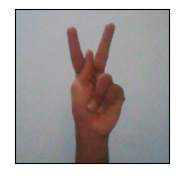

1/1 [==============================] - 0s 83ms/step
분류 : O/ 정답 : O


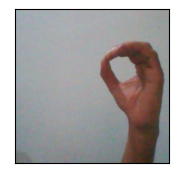

1/1 [==============================] - 0s 84ms/step
분류 : N/ 정답 : N


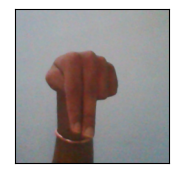

1/1 [==============================] - 0s 80ms/step
분류 : P/ 정답 : P


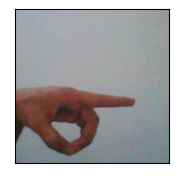

1/1 [==============================] - 0s 81ms/step
분류 : S/ 정답 : S


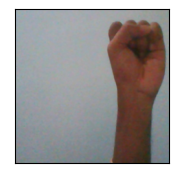

1/1 [==============================] - 0s 83ms/step
분류 : N/ 정답 : N


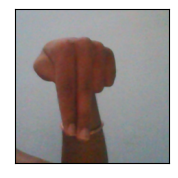

1/1 [==============================] - 0s 86ms/step
분류 : W/ 정답 : W


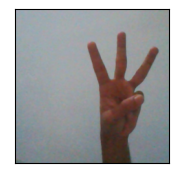

1/1 [==============================] - 0s 84ms/step
분류 : M/ 정답 : M


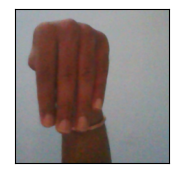

1/1 [==============================] - 0s 87ms/step
분류 : V/ 정답 : V


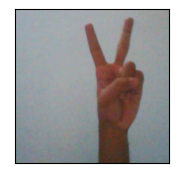

1/1 [==============================] - 0s 85ms/step
분류 : O/ 정답 : O


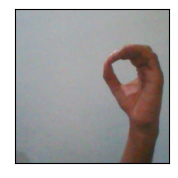

In [14]:
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]

width = 224
height = 224
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' + categories[np.argmax(t_test[i])])
    plt.show()